# Medication Compliance of Patients

### Prediction of patients who are likely to miss their medications using Patient information (Age, Gender) , medication prescription period, major disease indicators (Diabetes,TB, Alcoholism etc.)

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import Imputer
imputer = Imputer()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import sklearn as sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Exploratory Data Analysis
### Loading data into a Pandas dataframe

In [2]:
df=pd.read_csv('C:/Medication Data.csv')
patid = df['patient_id']
df.head(5)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


### No missing Data found (as seen below) but you need to transform features to make them meaningful. Gender and Adherence features have the type of object 

In [3]:
print('Rows and columns in dataframe : ',df.shape)

print('\n\nInformation about columns and missingness of data : \n')
print(df.info())

Rows and columns in dataframe :  (180212, 11)


Information about columns and missingness of data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB
None


In [4]:
df['Adherence'].replace(to_replace = ['No','Yes'], value = [0,1], inplace = True)

# Another way to change columns in the dataframe
#df['Adherence']= df['Adherence'].astype('category')
#df['Adherence'] = df['Adherence'].cat.codes

In [5]:
df['Gender'].replace(to_replace = ['M','F'], value = [1,0], inplace = True)

In [6]:
# Renaming gender column to keep track of the transformation
df.rename(columns = {'Gender' : 'Gender_M'}, inplace = True)
df.columns

Index(['patient_id', 'Age', 'Gender_M', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder',
       'Adherence'],
      dtype='object')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender_M               180212 non-null int64
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null int64
dtypes: int64(11)
memory usage: 15.1 MB
None


In [8]:
df.tail(5)

,patient_id,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
180207,180208,17,1,84,0,0,0,0,0,0,0
180208,180209,41,1,88,0,0,1,0,0,1,0
180209,180210,48,0,22,0,0,0,0,0,0,1
180210,180211,5,1,104,0,0,0,0,0,0,0
180211,180212,0,1,96,0,0,0,0,0,1,0


### Transformation looks good.
### Now we need to drop patient_id as it is of no meaningful value

In [9]:
df.drop(['patient_id'] , axis = 1, inplace = True)

In [10]:
df.head(5)

,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,19,1,7,0,0,0,0,0,0,0
1,24,0,59,0,0,0,0,0,0,0
2,4,0,43,0,0,0,0,0,0,0
3,38,1,66,0,0,0,0,0,1,0
4,46,0,98,0,0,0,0,0,1,0


## Exploratory analysis to see if any features show a trend for Adherence (target variable)

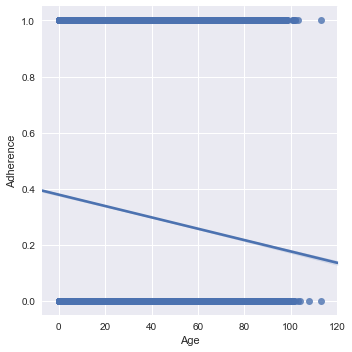

In [13]:
sns.lmplot(y="Adherence", x = 'Age',data=df)
# We see a slight trend of more non Adherence when the age of patient is older but this could be due to other features 
# (due to correlation)

6167


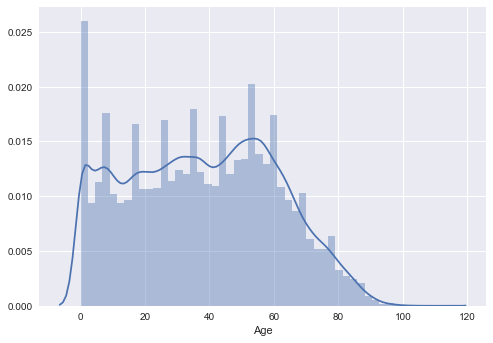

In [14]:
sns.distplot(df["Age"])
print((df['Age'] == 0).sum())
# 6167 records with missing age OR medications for new born children?

In [15]:
# Investigated to see if infants are marked as alcoholics, smokers etc.
df[df['Age']==0].groupby(['Tuberculosis']).aggregate('sum')

,Age,Gender_M,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Sms_Reminder,Adherence
Tuberculosis,,,,,,,,,
0,0,3122,342878,0,0,0,0,3349,1763
1,0,0,28,0,0,0,0,0,2


### RESULTS : Data doesn't have suspicious data points, which means that the Age 0 patients infact are infants , not missing data

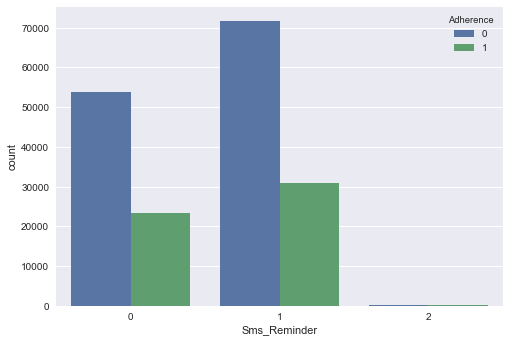

In [16]:
sns.countplot(x='Sms_Reminder', data=df, hue='Adherence')
#sns.countplot(x='Sms_Reminder', data=df[df['Sms_Reminder']==2], hue='Adherence')

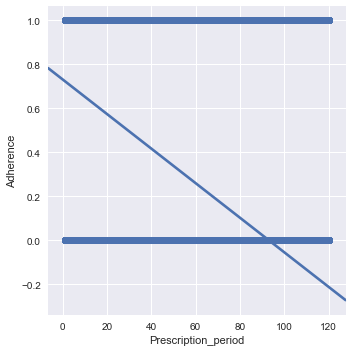

In [17]:
sns.lmplot(y="Adherence", x = 'Prescription_period',data=df )
# There is a stronger trend of non Adherence due to higher Prescription period

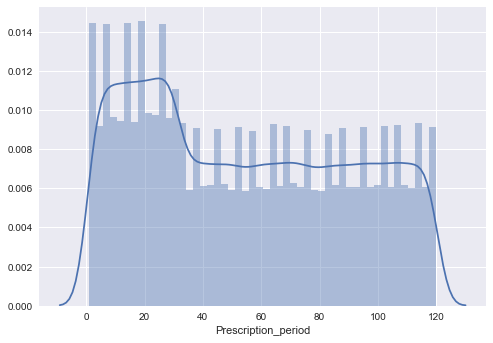

In [18]:
sns.distplot(df["Prescription_period"])
#sns.countplot(x="Prescription_period", data=df, hue = "Adherence")

### Most of the prescriptions are of lesser number of days, which would be natural
## We could strategize about log transformation of Age and Prescription period as they aren't normally distributed

## Other features do not show much effect on Adherence (below) but we would like to have it in the dataframe regardless of that

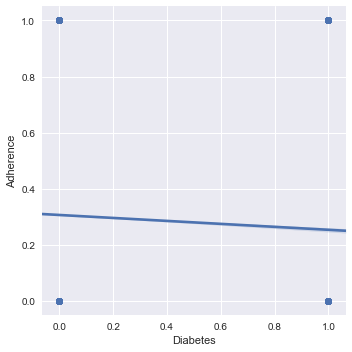

In [19]:
sns.lmplot(y="Adherence", x = 'Diabetes',data=df )

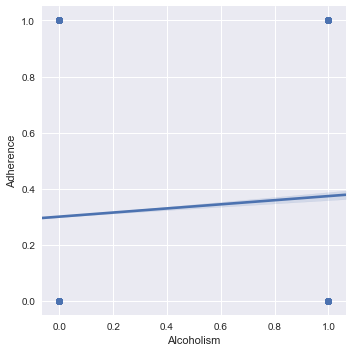

In [20]:
sns.lmplot(y="Adherence", x = 'Alcoholism',data=df )

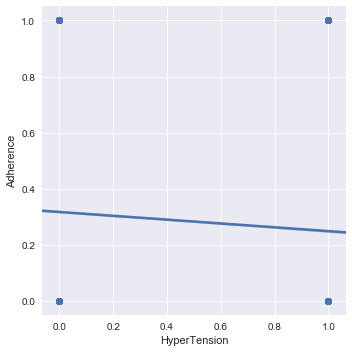

In [21]:
sns.lmplot(y="Adherence", x = 'HyperTension',data=df )

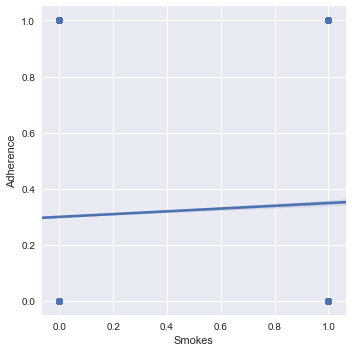

In [22]:
sns.lmplot(y="Adherence", x = 'Smokes',data=df )

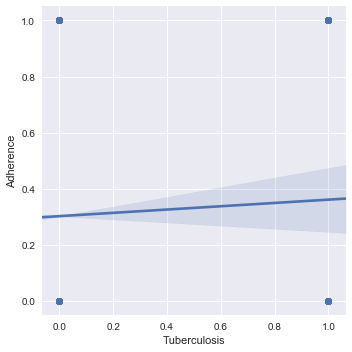

In [23]:
sns.lmplot(y="Adherence", x = 'Tuberculosis',data=df )

In [11]:
# Calculating VIF to check for correlation in numeric factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_numeric = df._get_numeric_data()
df_numeric.head()
df_numeric.drop(['Adherence'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
vif["features"] = df_numeric.columns
print(vif.round(1))

   VIF Factor             features
0         3.9                  Age
1         1.4             Gender_M
2         2.9  Prescription_period
3         1.3             Diabetes
4         1.2           Alcoholism
5         1.9         HyperTension
6         1.3               Smokes
7         1.0         Tuberculosis
8         2.0         Sms_Reminder
9         1.5            Adherence


### Looking at correlation of features
### It is ok to have correlated features as our interntion is prediction 
#### Note : in case there is a need to analyze which features contribute more towards Adherence, we would like to have a look at this plot closely and plan to reduce features using PCA

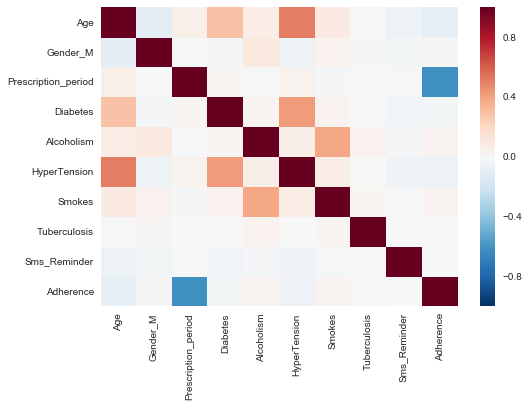

In [12]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Use below code if dataset is huge as it could be more efficient
# plt.matshow(df.corr())

## We see that the classes are unbalanced, i.e. we have more cases of No adherence.
### The classes are inbalanced but they aren't severely imbalanced so we should be good

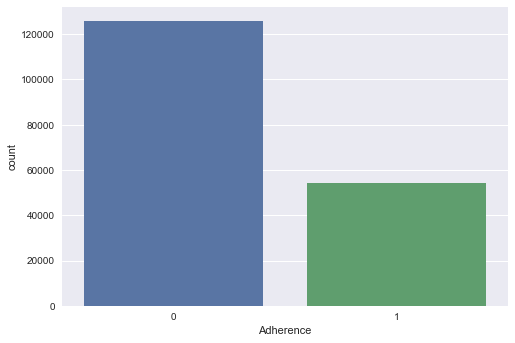

In [13]:
#sns.jointplot("Age", "Adherence", data=df, kind="reg", xlim=(0, 60), ylim=(0, 12), color="r", size=7)
#sns.pairplot(df, hue='Adherence', size=2.5)
#plt.subplots(figsize=(20,15))
#sns.countplot(y="Age", data=df, hue = "Adherence", order = df['Age'])

sns.countplot(x="Adherence", data=df)

## Splitting Data into Train and test sets

In [14]:
X = df.iloc[:, 0:9].values
y = df.iloc[:, -1].values

In [15]:
# Checking if data was split correctly
X[1:4]

array([[24,  0, 59,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 43,  0,  0,  0,  0,  0,  0],
       [38,  1, 66,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature scaling

In [17]:
# One hot encoding of SMS Reminder as it has 3 values
cat_vars=['Sms_Reminder']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['Sms_Reminder']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]

#print(data_final.columns.values)

In [18]:
# Need to scale after train test split?

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#print(X_train)

## Recursive feature elimination to see if any features can be eliminated at this stage

In [19]:
from sklearn import datasets
from sklearn.feature_selection import RFE

data_final_vars=data_final.columns.values.tolist()
y=['Adherence']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)
# NOTE: All features need to be selected for the model

X=data_final[X]
y=data_final[y]

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.364911
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Adherence   No. Observations:               180212
Model:                          Logit   Df Residuals:                   180201
Method:                           MLE   Df Model:                           10
Date:                Mon, 02 Apr 2018   Pseudo R-squ.:                  0.4041
Time:                        04:52:41   Log-Likelihood:                -65761.
converged:                       True   LL-Null:                   -1.1036e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.0089      0.000    -24.786      0.000      -0.010      -0.008
Ge

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # done
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


## Outputting predictions with prediction probabilities and confusion matrix onto into excel file

In [21]:
#Predicting for all data points
Trainpred = logreg.predict(X_train)
Trainprob = logreg.predict_proba(X_train)

totpred = np.concatenate((Trainpred,y_pred), axis=0)
totprob = np.concatenate((Trainprob,y_prob), axis=0)

#print(Trainpred[0:40])
#print(totpred[0:40])

#print(y_pred[-40:])
#print(totpred[-40:])

fin_prob=[]
#Selecting the higher probability as class is assigned according to the one which is >0.5
for i in totprob:
    addmax = max(i)
    fin_prob.append(addmax)

res=list(zip(patid,totpred,fin_prob))
#print(res[0:40])
#print([i[1] for i in res[0:40]])
#print([i[1] for i in res[-40:]])
#print(len(y_train))
#print(len(y_test))
#print(len(y))
#print(len(Trainpred))
#print(len(y_pred))
#print(len(totpred))

In [ ]:
#Results innto cvs file
with open('Result.csv', 'w',newline='') as outfile:
    mywriter = csv.writer(outfile)
    
    mywriter.writerow(['Patient_id','Adherence','Probability_score'])
    for d in res:
        mywriter.writerow(d)

In [22]:
#Confusion matrix and precision & recall
y_tot = np.concatenate((y_train,y_test), axis=0)

from sklearn.metrics import confusion_matrix
cmo = confusion_matrix(y_tot, totpred)
print('\n\nConfusion matrix of Full Data')
print(cmo)

cm = confusion_matrix(y_train, Trainpred)
print('\n\nConfusion matrix of Train Data')
print(cm)

cm2 = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix of Test Data')
print(cm2)



Confusion matrix of Full Data
[[113812  12010]
 [  9574  44816]]


Confusion matrix of Train Data
[[79623  8360]
 [ 6733 31432]]


Confusion matrix of Test Data
[[34189  3650]
 [ 2841 13384]]


## We have a bit of a bias towards false positives, which means we wrongly predict more people as likely to miss medication compared to wrongly predicting people not likely to miss medication
## This is a better bias as we would like to reach out to people and remind them to take their medication. We would lilke to maximize reaching out to defaulters and minimize missinig reaching out to defaulters 

## For curiosity purposes, we will evaluate confusion matrix after balancing the Adherence classes as well using oversampling/undersampling techniques

In [23]:
# classification report
from sklearn.metrics import classification_report
print('\n\nClassification report (0 is NO and 1 is YES)')
print(classification_report(y_test, y_pred))



Classification report (0 is NO and 1 is YES)
             precision    recall  f1-score   support

          0       0.92      0.90      0.91     37839
          1       0.79      0.82      0.80     16225

avg / total       0.88      0.88      0.88     54064



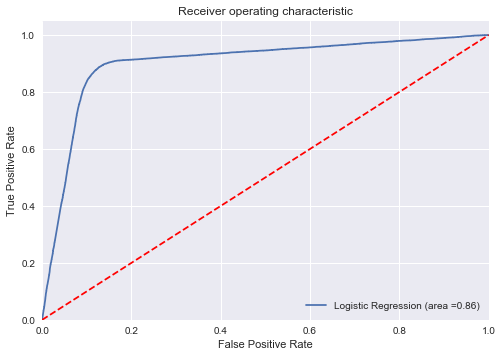

In [24]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area =%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
#DECISION TREE
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train.ravel())

y_pred = dtc.predict(X_train)
y_prob = dtc.predict_proba(X_train)
y_pred2 = dtc.predict(X_test)
y_prob2 = dtc.predict_proba(X_test)
#print(y_prob2[:20])
from sklearn.metrics import accuracy_score
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred2)))
dt_cm = confusion_matrix(y_test, y_pred2)
print('\n\nConfusion matrix')
print(dt_cm)

Accuracy of decision tree classifier on test set: 0.85


Confusion matrix
[[33854  3985]
 [ 4153 12072]]


In [26]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.350176493327
fit_time  std  0.0472046097756
score_time  mean  0.0138992468516
score_time  std  0.00122096613838
test_score  mean  0.880378591539
test_score  std  0.000627162970111
train_score  mean  0.88055696416
train_score  std  0.000397790086115
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  132.421797276
fit_time  std  5.11027956889
score_time  mean  28.0241624514
score_time  